In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

In [3]:
xx = pd.read_csv('SG_usedcar1.csv')

In [4]:
xx

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Coe_left_days,Coe_left_months,Brand_name
0,Honda Vezel 1.5A X Honda Sensing,SUV,2015-10-14,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,1587,52.233333,Honda
1,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,2007-12-28,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,566,18.700000,Suzuki
2,Porsche 718 Cayman 2.0A PDK,Sports Car,2017-07-19,6yrs 1mth 12days COE left),34200,21000,1200,106829,50110,1988,1365,2017,Auto,71979,101563,220,1,259988,2232,73.400000,Porsche
3,Hyundai Elantra 1.6A Elite,Mid-Sized Sedan,2014-11-14,3yrs 5mths 7days COE left),11010,35000,738,31339,64900,1591,1292,2014,Auto,13856,13856,97,1,44800,1252,41.233333,Hyundai
4,Kia Cerato 1.6A GT Line Sunroof,Mid-Sized Sedan,2019-07-04,8yrs 27days COE left),9450,21200,738,38416,30009,1591,1287,2018,Auto,18894,18894,93,1,85800,2947,96.900000,Kia
5,BMW 3 Series 320i,Luxury Sedan,2012-12-05,1yr 5mths 28days COE left),17610,170000,1210,33118,86889,1997,1420,2012,Auto,38514,38514,135,2,45600,543,17.933333,BMW
6,Mitsubishi Lancer EX 2.0A GLS (COE till 03/2028),Mid-Sized Sedan,2008-03-28,6yrs 9mths 21days COE left),7470,251000,1694,30648,44998,1998,1427,2007,Auto,17722,17722,114,2,50900,2481,81.700000,Mitsubishi
7,Mercedes-Benz E-Class E250 Edition E Sunroof,Luxury Sedan,2016-02-29,4yrs 8mths 22days COE left),18450,84000,1202,70842,50089,1991,1680,2015,Auto,52959,67327,155,2,120999,1722,56.733333,Mercedes-Benz
8,Mercedes-Benz C-Class C180 Avantgarde,Luxury Sedan,2015-05-14,3yrs 11mths 7days COE left),18550,98000,740,47541,68668,1595,1425,2015,Auto,35392,31549,115,1,88800,1432,47.233333,Mercedes-Benz
9,Audi S5 Sportback 3.0A TFSI Quattro (COE till ...,Sports Car,2010-11-25,9yrs 5mths 18days COE left),11280,105000,2618,37909,40014,2995,1755,2010,Auto,64519,64519,245,5,106888,3453,113.600000,Audi


In [5]:
X = xx.drop(['Price','Brand','Type','Reg_date','Coe_left','Transmission','Manufactured','Brand_name','Coe_left_days','Coe_left_months'], axis=1)
y = xx['Price']

In [6]:
print(X.head(5))

     Dep  Mileage  Road Tax  Dereg Value    COE  Engine Cap  Curb Weight  \
0  10310    50000       682        31237  56001        1496         1190   
1   8210   203000      1030         6656  21349        1586         1060   
2  34200    21000      1200       106829  50110        1988         1365   
3  11010    35000       738        31339  64900        1591         1292   
4   9450    21200       738        38416  30009        1591         1287   

     OMV     ARF  Power  No. of Owners  
0  19775    9775     96              2  
1  12154   13370     92              2  
2  71979  101563    220              1  
3  13856   13856     97              1  
4  18894   18894     93              1  


# Neural Networks

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled, columns = X.columns)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = MLPRegressor(hidden_layer_sizes=(500,250,125), max_iter=500, 
                     activation='relu', random_state=42, solver = 'adam', batch_size = 1024, learning_rate = 'adaptive')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print(f"训练集MSE: {mse}")
print(f"训练集RMSE: {rmse}")


训练集MSE: 114089891.82912485
训练集RMSE: 10681.286993107378


In [11]:
print(model.score(X_train,y_train))

0.9859473858963708


In [12]:
print(model.score(X_test,y_test))

0.9825804538799805


In [13]:
y_pred = model.predict(X_test)

In [14]:
y_test1 = y_test.values.astype(float)
percentage_errors = np.abs((y_test1 - y_pred) / y_test1)
mape = np.mean(percentage_errors) * 100
print((f' MAPE: {mape}'))

 MAPE: 7.270415896503252


In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9825804538799805


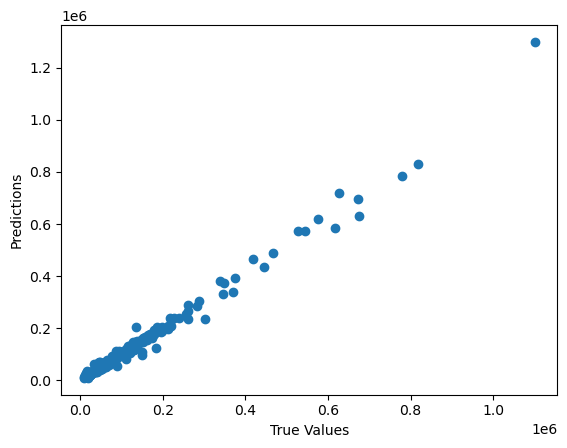

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

C:\Users\ieie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ieie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ieie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ieie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ieie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or l

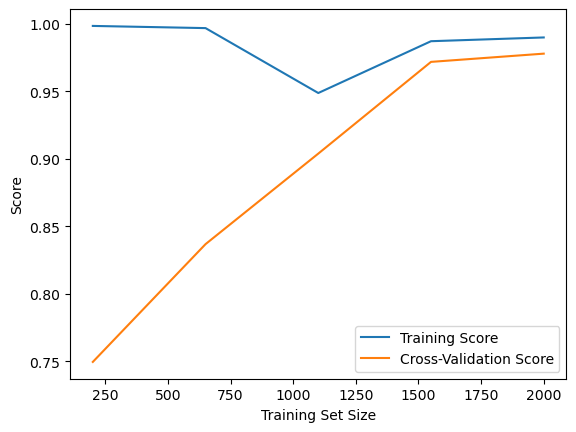

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()

# Correlation

In [18]:
df = pd.concat([X,y], axis=1)

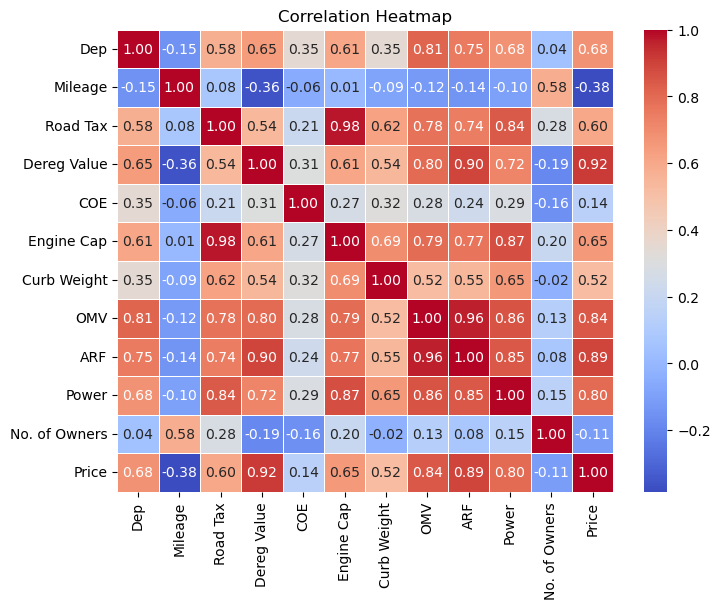

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


# DecisionTree--regression tree

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [21]:
regression_tree = DecisionTreeRegressor(
    criterion='mae',
    splitter='best',
    max_depth=24,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    random_state=None,
    min_impurity_decrease=0.0
)
regression_tree.fit(X_train, y_train)

C:\Users\ieie\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', max_depth=24, min_samples_leaf=2)

In [22]:
y_pred1 = regression_tree.predict(X_test)

In [23]:
print(regression_tree.score(X_train,y_train))

0.9879704772314913


In [24]:
print(regression_tree.score(X_test,y_test))

0.9394922924485645


In [25]:
mape = 100 * (abs((y_test - y_pred1) / y_test)).mean()

In [26]:
mape

8.712126662481891

In [27]:
tree_depth = regression_tree.tree_.max_depth

In [28]:
print(tree_depth)

21


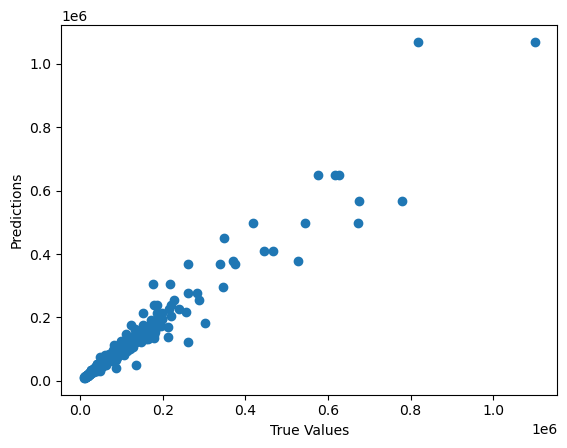

In [29]:
plt.scatter(y_test, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# RandomForest

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [31]:
random_forest = RandomForestRegressor(
    n_estimators=100,
    criterion='mae',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True,
    random_state=None,
    min_impurity_decrease=0.0
)
random_forest.fit(X_train, y_train)

C:\Users\ieie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae')

In [32]:
y_pred3 = random_forest.predict(X_test)

In [33]:
print(random_forest.score(X_train,y_train))

0.9936138157953084


In [34]:
print(random_forest.score(X_test,y_test))

0.9644298719889801


In [35]:
mape = 100 * (abs((y_test - y_pred3) / y_test)).mean()
print(mape)

6.3506807342348495


In [36]:
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print("RandomForestRegressor Metrics:")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

RandomForestRegressor Metrics:
Mean Absolute Error: 7534.429230000001
Mean Squared Error: 407797063.4951222
R-squared: 0.9644298719889801


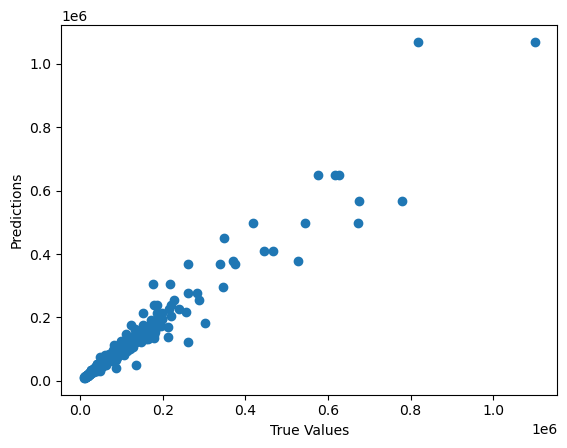

In [37]:
plt.scatter(y_test, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# linear regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [39]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred4 = linear_reg.predict(X_test)

In [41]:
print(linear_reg.score(X_train,y_train))

0.9299652331396009


In [42]:
print(linear_reg.score(X_test,y_test))

0.9375367102814857


In [43]:
mape = 100 * (abs((y_test - y_pred3) / y_test)).mean()
print(mape)

6.3506807342348495


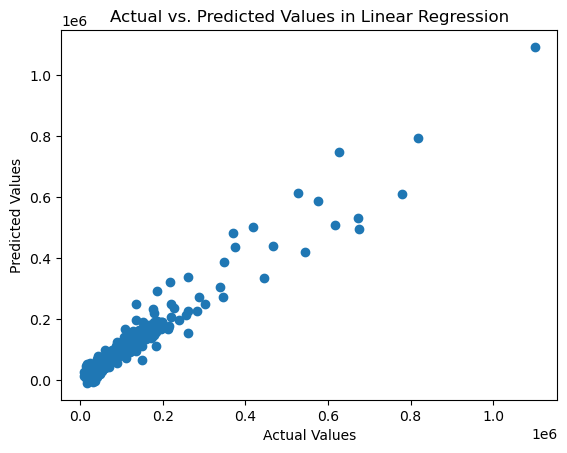

In [44]:
plt.scatter(y_test, y_pred4)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values in Linear Regression")
plt.show()

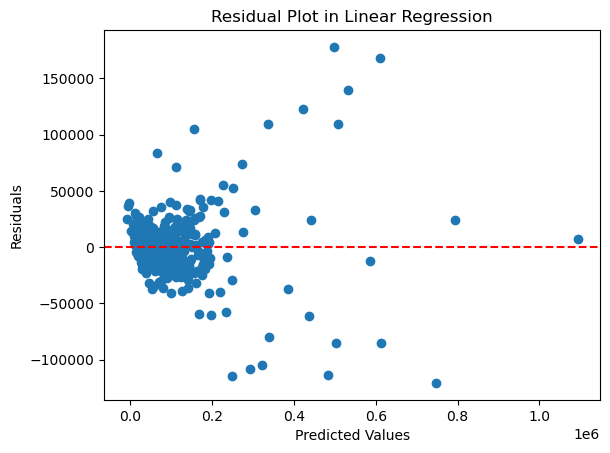

In [45]:
residuals = y_test - y_pred4
plt.scatter(y_pred4, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot in Linear Regression")
plt.show()

# SVM

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
svr = SVR(
    kernel='linear',
    C=100,
    gamma='auto',
    degree=3,
    coef0=0.0,
    epsilon=0.1,
    shrinking=True,
    max_iter=-1
)                                  #  You can choose different kernel functions and tune hyperparameters
svr.fit(X_train, y_train)